In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("housing.csv")
actual_data = pd.DataFrame(df)
actual_data["income_cat"] = pd.cut(actual_data["median_income"], bins = [0 , 1.5 , 3.0 , 4.5 , 6.0 , np.inf ] , labels = [1 , 2 , 3 , 4  , 5 ])
actual_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [2]:
actual_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [3]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


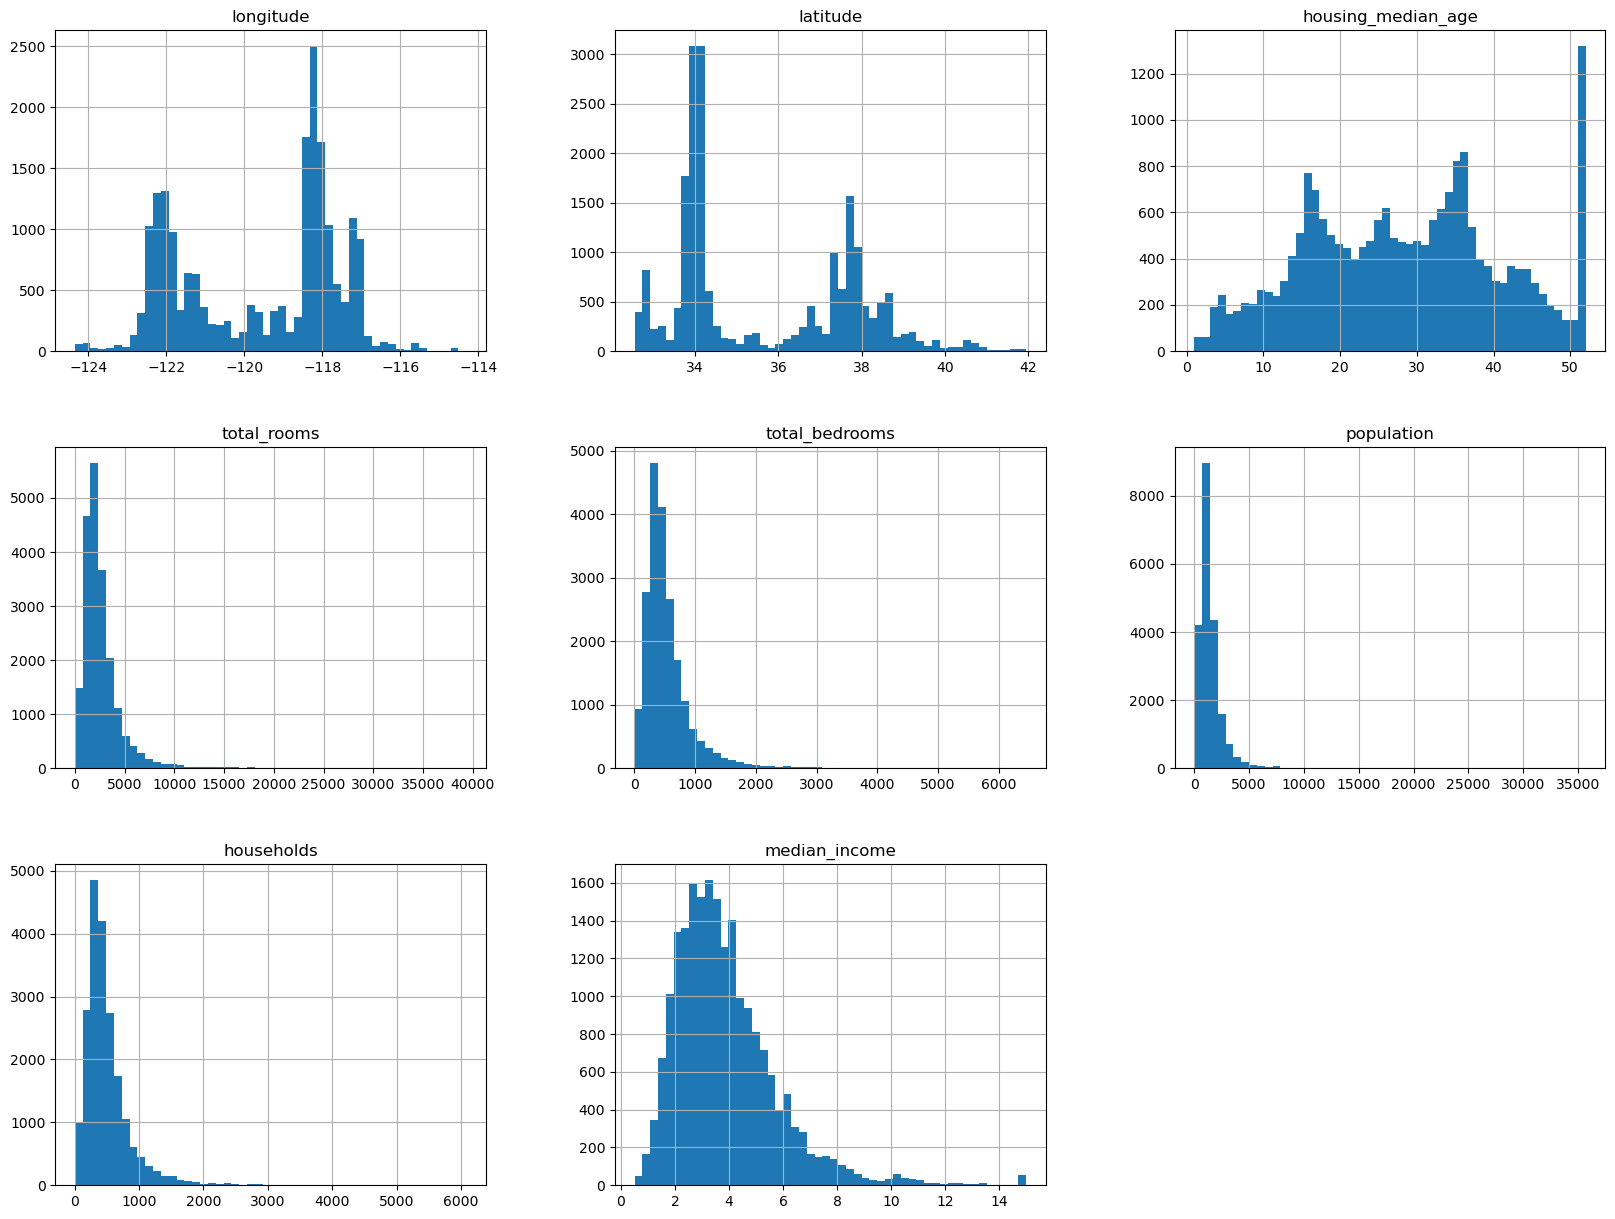

In [4]:
features_data  = actual_data.drop("median_house_value" , axis = 1)
import matplotlib.pyplot as plt
#histogram plot of featues data
features_data.hist(bins=50 , figsize=(20 , 15))
plt.show()


In [5]:
#seprating train test split
import numpy as np
def shuffle_split(data , test_ratio):
    np.random.seed(42) #for reproducibility
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_set = shuffle_indices[:test_set_size]
    train_set =shuffle_indices[test_set_size:]
    return data.iloc[train_set] , data.iloc[test_set]


data = actual_data.copy()
train , test = shuffle_split(data , 0.2)

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3


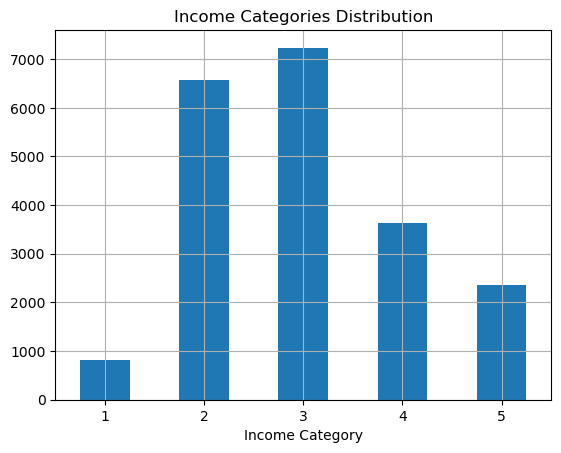

In [7]:
import matplotlib.pyplot as plt
actual_data["income_cat"].value_counts().sort_index().plot.bar(rot = 0 , grid = True)
plt.xlabel("Income Category")
plt.title("Income Categories Distribution")
plt.show()

In [8]:
#using stratified split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1  , test_size=0.2 , random_state=42)
for train_index , test_index in split.split(actual_data , actual_data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

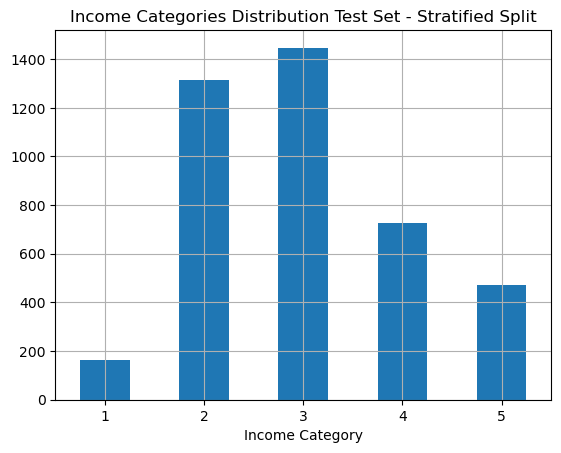

In [9]:
# Add income_cat to stratified sets first
strat_train_set["income_cat"] = pd.cut(strat_train_set["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
strat_test_set["income_cat"] = pd.cut(strat_test_set["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

# Now plot the distribution
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.title("Income Categories Distribution Test Set - Stratified Split")
plt.show()

In [11]:
#creating train _ test split
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(data , test_size=0.2 , random_state=42)


<Axes: xlabel='longitude', ylabel='latitude'>

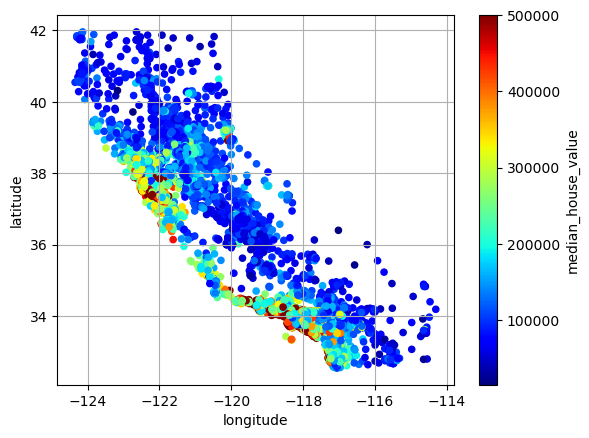

In [18]:
#visulaizing the data
import matplotlib.pyplot as plt
train_set.plot(kind="scatter" , x="longitude" , y="latitude" , grid = True ,  cmap = "jet" , c="median_house_value" )



array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

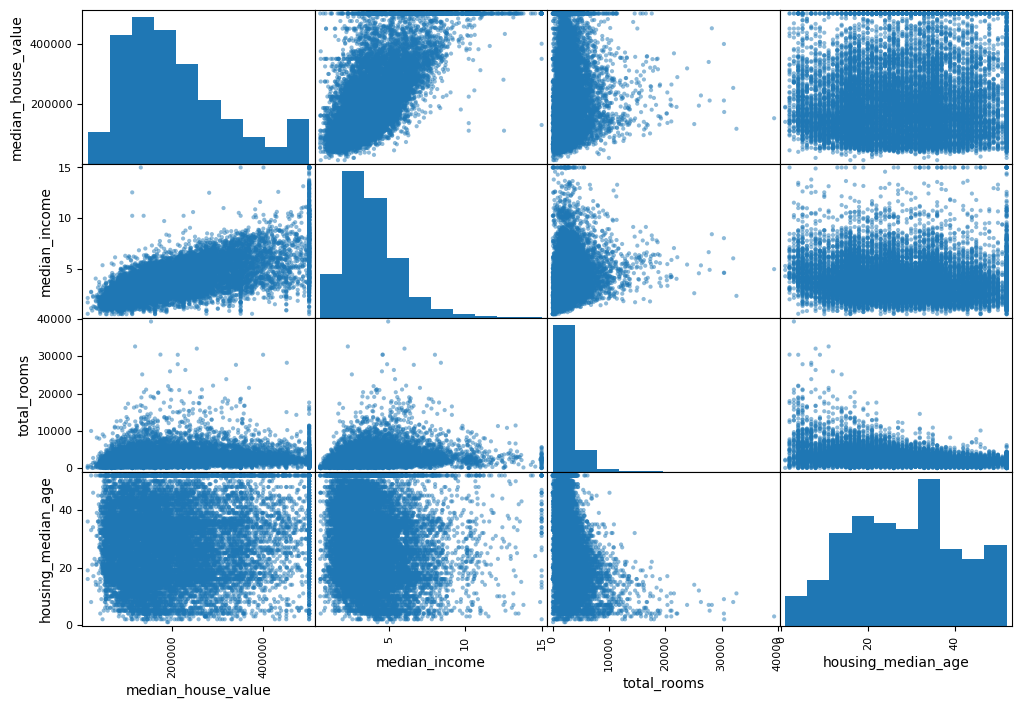

In [19]:
attributes = ["median_house_value" , "median_income" , "total_rooms" , "housing_median_age"]
pd.plotting.scatter_matrix(train_set[attributes] , figsize=(12 , 8))